## An exemple: insertion sort

<img src="https://upload.wikimedia.org/wikipedia/commons/0/0f/Insertion-sort-example-300px.gif" style="width:50%; float:center">

The code to implement a insertion sort algorithm on top of numpy array

In [12]:
import numpy as np
def insertion_sort(ar, key = lambda x: x):
    ar = ar.copy()
    previous = ar[0]
    for i in range(1, len(ar)): # O(n)
        if key(ar[i]) < key(previous):
            el = ar.pop(i) # O(n - i)
            for insertion_index in range(len(ar)): # O(i)
                if key(ar[insertion_index]) >= key(el):
                    break
            ar.insert(insertion_index, el) # O(n - i)
        else:  
            previous = ar[i]
    return ar

# C = O(n) * ((2*O(n - i) + O(i))) = O(n²)

ar = list(np.random.randint(1, 100, 10))
print(ar)
insertion_sort(ar)

[np.int64(34), np.int64(16), np.int64(89), np.int64(3), np.int64(94), np.int64(68), np.int64(88), np.int64(77), np.int64(87), np.int64(37)]


[np.int64(3),
 np.int64(16),
 np.int64(34),
 np.int64(37),
 np.int64(68),
 np.int64(77),
 np.int64(87),
 np.int64(88),
 np.int64(89),
 np.int64(94)]

We are now plotting the complexity size of the container VS insertion sort time

100%|██████████| 34/34 [00:01<00:00, 19.29it/s] 


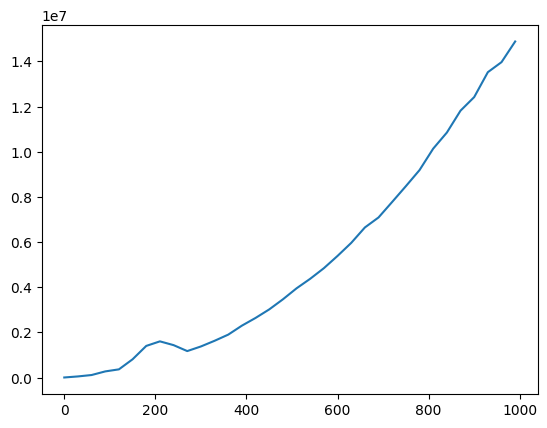

In [13]:
import numpy as np
from time import time_ns
import matplotlib.pyplot as plt
from tqdm import tqdm

k = 10
N = 1000
step = 30
size = N//step + (1 if N%step else 0)
times_v1 = np.zeros((size, k))
for i in tqdm(range(1, N, step)):
    for j in range(k):
        ar = list(np.random.randint(1, 100, i))
        t0 = time_ns()
        insertion_sort(ar)
        times_v1[i//step, j] = time_ns() - t0

plt.plot(np.arange(size)*step, np.mean(times_v1, axis=1))

We will now compare with the Python sorted function

100%|██████████| 1000/1000 [00:16<00:00, 59.82it/s]


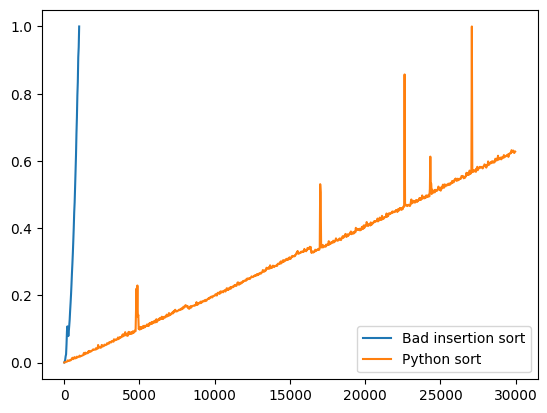

In [14]:
k = 10
N_default = 30000
step = 30
times_default = np.zeros((N_default//step, k))
size_default = N_default//step + (1 if N_default%step else 0)
for i in tqdm(range(1, N_default, step)):
    for j in range(k):
        ar = list(np.random.randint(1, 100, i))
        t0 = time_ns()
        sorted(ar)
        times_default[i//step, j] = time_ns() - t0

plt.plot(np.arange(size)*step, np.mean(times_v1, axis=1)/np.max(np.mean(times_v1, axis=1)), label="Bad insertion sort")
plt.plot(np.arange(size_default)*step, np.mean(times_default, axis=1)/np.max(np.mean(times_default, axis=1)), label="Python sort")
plt.legend()

Testing a merge k-sorted list algorithm  

<img src="https://upload.wikimedia.org/wikipedia/commons/f/f8/Loser_tree_merge.gif" style="width:50%; float:center">

In [15]:
from bisect import bisect_left

def insertion_sort3(ar, key = lambda x: x):
    ar = ar.copy()
    previous = ar[0]
    for i in range(1, len(ar)): # O(n)
        if key(ar[i]) < key(previous):
            el = ar[i]
            j = bisect_left(ar, el, lo=0, hi=i) # O(log(i))
            ar[j], ar[j+1:i+1] = el, ar[j:i] # O(i - j)
        else:
            previous = ar[i]
    return ar

# C = O(n²)

ar = list(np.random.randint(1, 100, 10))
insertion_sort3(ar)

[np.int64(21),
 np.int64(32),
 np.int64(34),
 np.int64(53),
 np.int64(61),
 np.int64(64),
 np.int64(73),
 np.int64(90),
 np.int64(96),
 np.int64(96)]

We compare with our previous implementation

In [16]:
ar = list(np.random.randint(1, 100, 1000))
%timeit insertion_sort(ar.copy())
%timeit insertion_sort3(ar.copy())

15.1 ms ± 135 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
725 µs ± 995 ns per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


We now compare with previous results

100%|██████████| 1000/1000 [07:25<00:00,  2.25it/s]


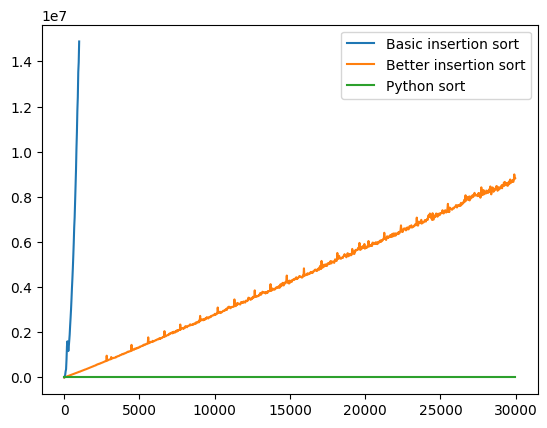

In [17]:
import numpy as np
from time import time_ns
import matplotlib.pyplot as plt
from tqdm import tqdm

k = 100
N_default = 30000
step = 30
size_default = N_default//step + (1 if N_default%step else 0)
n_errors = 10
times = np.zeros((size_default, k))
for i in tqdm(range(1, N_default, step)):
    for j in range(k):
        ar = list(range(i))
        for _ in range(n_errors):
            a, b = np.random.randint(0, i, 2)
            ar[a], ar[b] = ar[b], ar[a]
        t0 = time_ns()
        insertion_sort3(ar)
        times[i//step, j] = time_ns() - t0

plt.plot(np.arange(size)*step, np.mean(times_v1, axis=1), label="Basic insertion sort")
plt.plot(np.arange(size_default)*step, np.mean(times, axis=1), label="Better insertion sort")
plt.plot(np.arange(size_default)*step, np.mean(times_default, axis=1)/np.max(np.mean(times_default, axis=1)), label="Python sort")
plt.legend()

100%|██████████| 1000/1000 [00:21<00:00, 46.38it/s]


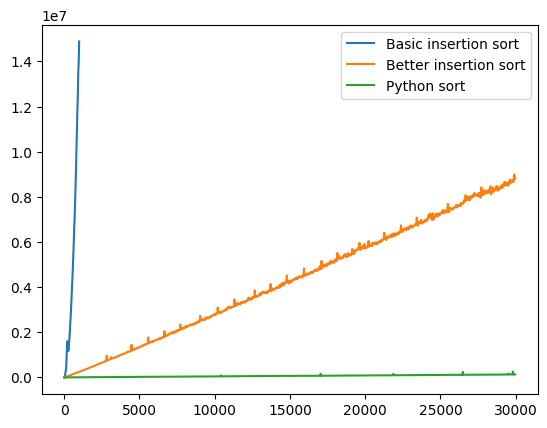

In [18]:
k = 100
N_default = 30000
step = 30
n_errors = 10
size_default = N_default//step + (1 if N_default%step else 0)
times_default = np.zeros((N_default//step, k))
for i in tqdm(range(1, N_default, step)):
    for j in range(k):
        ar = list(range(i))
        for _ in range(n_errors):
            a, b = np.random.randint(0, i, 2)
            ar[a], ar[b] = ar[b], ar[a]
        t0 = time_ns()
        sorted(ar)
        times_default[i//step, j] = time_ns() - t0
        
plt.plot(np.arange(size)*step, np.mean(times_v1, axis=1), label="Basic insertion sort")
plt.plot(np.arange(size_default)*step, np.mean(times, axis=1), label="Better insertion sort")
plt.plot(np.arange(size_default)*step, np.mean(times_default, axis=1), label="Python sort")
plt.legend()

Should we change the container ?

We try with a sorted dictionnary

100%|██████████| 1000/1000 [01:17<00:00, 12.97it/s]


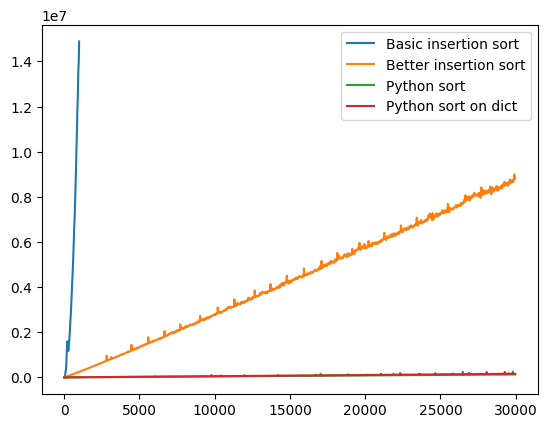

In [19]:
k = 100
N_default = 30000
step = 30
n_errors = 10
size_default = N_default//step + (1 if N_default%step else 0)
times_dict = np.zeros((N_default//step, k))
for i in tqdm(range(1, N_default, step)):
    for j in range(k):
        ar = list(range(i))
        for _ in range(n_errors):
            a, b = np.random.randint(0, i, 2)
            ar[a], ar[b] = ar[b], ar[a]
        res_dict = {ar[j] : ar[j] for j in range(i)}
        t0 = time_ns()
        sorted(res_dict)
        times_dict[i//step, j] = time_ns() - t0
        
plt.plot(np.arange(size)*step, np.mean(times_v1, axis=1), label="Basic insertion sort")
plt.plot(np.arange(size_default)*step, np.mean(times, axis=1), label="Better insertion sort")
plt.plot(np.arange(size_default)*step, np.mean(times_default, axis=1), label="Python sort")
plt.plot(np.arange(size_default)*step, np.mean(times_dict, axis=1), label="Python sort on dict")
plt.legend()

# Parallel sort Algorithms

We divide the list in N block, we sort these block in parallel, we merge them two by two recursively until you have one list

Implement the bitonic sort algorithm : https://www.pythonpool.com/bitonic-sort-python/

https://media.geeksforgeeks.org/wp-content/uploads/bitonic3.png

Workflow: https://www.baeldung.com/wp-content/uploads/sites/4/2022/09/The-flowchart-of-Bitonic-Sort.jpg
Unsorted to bitonic : https://www.baeldung.com/wp-content/uploads/sites/4/2022/09/bitonic_example.jpg
Bitonic to sorted : https://www.baeldung.com/wp-content/uploads/sites/4/2022/09/bitonic_sort.jpg
Algorithm : https://www.baeldung.com/wp-content/ql-cache/quicklatex.com-1a6b76f72f3839bc1c324306b4c1c198_l3.svg


In [20]:
%load_ext cython

The cython extension is already loaded. To reload it, use:
  %reload_ext cython


In [21]:
import cython

In [22]:
%%cython
import numpy as np
cimport numpy as np
from cython.parallel import prange
cimport cython

@cython.boundscheck(False)
@cython.wraparound(False)
def bitonic_sort(np.ndarray[np.double_t, ndim=1] arr, bint ascending=True):
    cdef Py_ssize_t n = arr.shape[0]
    if n <= 1:
        return

    # Make the array to a power of 2 length
    cdef Py_ssize_t next_power_of_two = 1 << (n - 1).bit_length()
    padded_arr = np.pad(arr, (0, next_power_of_two - n), constant_values=np.inf)
    cdef double[:] a = padded_arr

    
    cdef Py_ssize_t size, stride, i, j
    cdef bint up

    with nogil:
        size = 2
        while size <= next_power_of_two:
            stride = size // 2
            while stride > 0:
                # Parallel loop for comparing and swapping elements
                for i in prange(next_power_of_two, schedule='static'):
                    j = i ^ stride
                    if j > i:
                        up = ((i & size) == 0)
                        if not ascending:
                            up = not up
                        if (a[i] > a[j]) == up:
                            a[i], a[j] = a[j], a[i]
                stride //= 2
            size <<= 1

    # After sorting, remove the padding by truncating the array back to the original size
    arr[:] = padded_arr[:n]


100%|██████████| 1000/1000 [02:19<00:00,  7.15it/s]


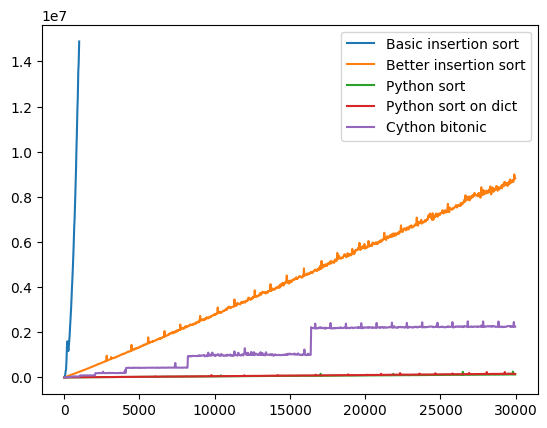

In [24]:
from tqdm import tqdm
k = 100
N_default = 30000
step = 30
n_errors = 10
size_default = N_default//step + (1 if N_default%step else 0)
times_cython = np.zeros((N_default//step, k))
for i in tqdm(range(1, N_default, step)):
    for j in range(k):
        ar = np.arange(i, dtype=np.float64)
        for _ in range(n_errors):
            a, b = np.random.randint(0, i, 2)
            ar[a], ar[b] = ar[b], ar[a]
        t0 = time_ns()
        bitonic_sort(ar)
        times_cython[i//step, j] = time_ns() - t0
        
plt.plot(np.arange(size)*step, np.mean(times_v1, axis=1), label="Basic insertion sort")
plt.plot(np.arange(size_default)*step, np.mean(times, axis=1), label="Better insertion sort")
plt.plot(np.arange(size_default)*step, np.mean(times_default, axis=1), label="Python sort")
plt.plot(np.arange(size_default)*step, np.mean(times_dict, axis=1), label="Python sort on dict")
plt.plot(np.arange(size_default)*step, np.mean(times_cython, axis=1), label="Cython bitonic")
plt.legend()